First derivative:  -2*L**2*(-2*M/r + 1)/r**3 + 2*M*(L**2/r**2 + 1)/r**2
Solution for angular momentum:  [M*r**2/(-3*M + r)]
Second derivative:  -8*L**2*M/r**5 + 6*L**2*(-2*M/r + 1)/r**4 - 4*M*(L**2/r**2 + 1)/r**3
6*(1 - 2/r)/(r**2*(r - 3)) - 4*(1 + 1/(r - 3))/r**3 - 8/(r**3*(r - 3))


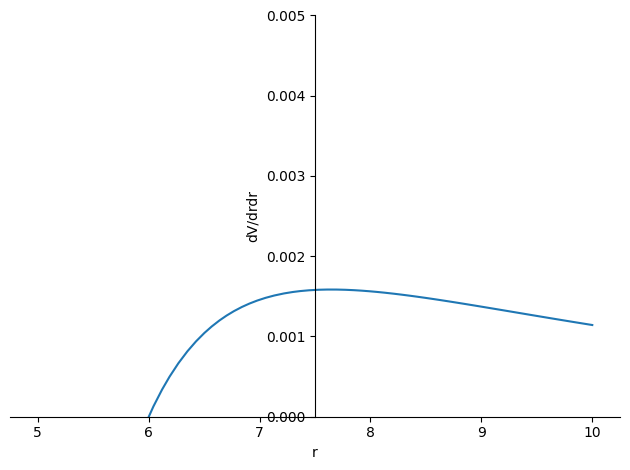

In [2]:
import sympy as sp
from sympy.plotting import plot
r, M , L= sp.symbols('r M L')

V = (1-2*M/r)*(1+L**2/r**2)
dVdr = sp.diff(V, r)
sol_L = sp.solve(dVdr, L**2)
print("First derivative: ",dVdr)
print("Solution for angular momentum: ",sol_L)


dVdrdr = sp.diff(dVdr,r)
second_sol  =sp.solve(dVdrdr, r)
print("Second derivative: ",dVdrdr)
dv_plot = dVdrdr.subs(L**2, sol_L[0]).subs(M,1)
print(dv_plot)


plot(dv_plot, (r, 5, 10),
     xlabel='r',
     ylabel='dV/drdr',
     ylim=(0, 0.005))


In [3]:
E_c = (r-2*M)**2/(r*(r-3*M))
dfdr = sp.diff(E_c, r)
sol = sp.solve(dfdr, r)
print("First derivative: ",dfdr)
print("Its solutions: ",sol)

dfdrdr = sp.diff(dfdr,r)
second_sol  =sp.solve(dfdrdr, r)
print("Second derivative: ",dfdrdr.subs(M,1))
print("Energy minimum check (>0): ",dfdrdr.subs(M,1).subs(r,6))



First derivative:  (-4*M + 2*r)/(r*(-3*M + r)) - (-2*M + r)**2/(r*(-3*M + r)**2) - (-2*M + r)**2/(r**2*(-3*M + r))
Its solutions:  [2*M, 6*M]
Second derivative:  2/(r*(r - 3)) - 2*(2*r - 4)/(r*(r - 3)**2) + 2*(r - 2)**2/(r*(r - 3)**3) - 2*(2*r - 4)/(r**2*(r - 3)) + 2*(r - 2)**2/(r**2*(r - 3)**2) + 2*(r - 2)**2/(r**3*(r - 3))
Energy minimum check (>0):  1/81


In [4]:
slopes = [complex(x.subs(M,1)) for x in second_sol]
print("All solutions: ", slopes)
p = slopes[-1]
#The third derivative should be zero for the slope maximum
dfdrdrdr = sp.diff(dfdrdr, r)
if(dfdrdrdr.subs(M,1).subs(r, p)< 0):
    print("The slope maximum > 6M is at :", p.real, "M")

All solutions:  [(1.9463784241210271-0.8075176349448402j), (1.9463784241210271+0.8075176349448402j), (8.107243151757945+0j)]
The slope maximum > 6M is at : 8.107243151757945 M


Specific energy at ISCO:  2*sqrt(2)/3


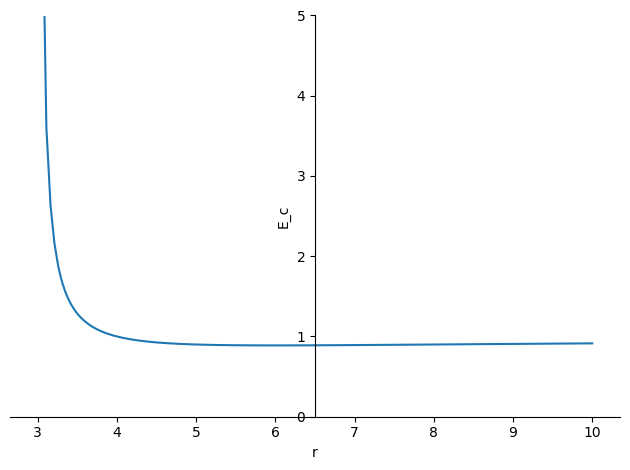

In [5]:
E_c_M1 = E_c.subs(M, 1)
print("Specific energy at ISCO: ", sp.sqrt(E_c.subs(M,1).subs(r ,6)))
plot(E_c_M1, (r, 3, 10),
     xlabel='r',
     ylabel='E_c',
     ylim=(0, 5))
